#**Lab 8 - Linear Transformations**

Enter your code in the spaces provided. Do not change any of the variable names or function names that are already provided for you. In places where we specify the name of the return value, make sure that your code produces the a value with the correct name.

In [0]:
# Do not edit this cell.

LabID="Lab8"

**Enter your name, section number, and BYU NetID**

In [0]:
# Enter your first and last names in between the quotation marks.

first_name="Jared"

last_name="Wright"

# Enter your section number in between the quotation marks. 

section_number="2"  

# Enter your BYU NetID in between the quotation marks.  NOT YOUR BYU ID NUMBER!

BYUNetID="jaredmw2"

**Import NumPy**

In [0]:
import numpy as np

**Problem 1**

In [0]:
# This function reads in a vector and output the transformed vector Ax.

def transform(x):
  matrixA=([[2,1],[1,-3],[0,1]])
  x_prime=np.matmul(matrixA,x)
  # Put your code here, which should redefine x_prime as described in Problem 1. Do not change anything in the function definition or return statement lines.
  return x_prime

#transform([1,2])

**Downloading and visualizing our data**

The simplest way to load the data into Colab is to first download it as a .csv file to your local computer by clicking the link

https://drive.google.com/file/d/1tWus0zXDSahrms0dl8TTV0Pl8bbWlx9j/view?usp=sharing

This will take you to a page where you can download the data as a .csv file. We will upload the data in a slightly different way than last week, which is a bit more stable.  In the top left corner of this screen you should see a little arrow icon.   Selecting it opens a new window to the left of the notebook with three tabs: "Table of contents", "Code snippets", and "Files."  Select the "Files" option, then select "Upload".  This should bring up a window that allows you to select the file cougar.csv from your local machine, which will upload the file to your notebook.  You will need to do this again if you decide to close your notebook and reopen it at a later time.

Once you've uploaded your file, convert it to a NumPy array called "cougar" by executing the following cell.

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('cougar.csv')
cougar=df.values
cougar

array([[ 0.11833, -0.665  ,  0.035  , ..., -0.1    ,  0.685  , -0.51   ],
       [-0.265  ,  0.44333, -0.84833, ...,  0.115  ,  0.31167,  0.69667]])

Now let's define a function that we can use to plot the array cougar that we've just created (or any other array of points which we'd like to visualize).

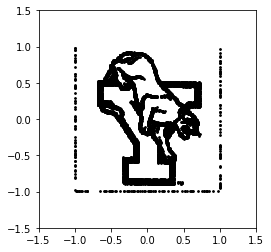

In [6]:
def showplot(H):
  # This function displays the image produce by the collection of coordinates given in H
  cougarplot=plt.plot(H[0,:],H[1,:],'k.',markersize=3.5)
  plt.axis([-1.5,1.5,-1.5,1.5])
  plt.gca().set_aspect("equal")
  plt.show()
  return None


# Let's test the function above by plotting the data in our NumPy array cougar  
showplot(cougar)

**Problem 2**

In [0]:
# This function should take a matrix of coordinates, and output a coordinate matrix which corresponds to the image that has been stetched in the 
# horizantal direction by a factor of a and in the verticle direction by a factor of b.

def stretch(image,a,b): 
  matrixA=([[a,0],[0,b]])
  new_image=np.matmul(matrixA,image)
  # Put your code here which should correctly redefine new_image. Do not change anything in the function definition or return statement lines.
  return new_image 

#showplot(stretch(cougar,9,2))

In [0]:
# This function should take a matrix of coordinates, and output a coordinate matrix which corresponds to the image that has been sheared by a horizantal factor of a and 
# a vertical factor of b

def shear(image,a,b): 
  matrixA=([[1,a],[b,1]])
  new_image=np.matmul(matrixA,image)
  # Put your code here which should correctly redefine new_image. Do not change anything in the function definition or return statement lines.
  return new_image 

#showplot(shear(cougar,.5,0))

In [0]:
# This function should take a matrix of coordinates, and output a coordinate matrix which corresponds to the image that has been reflected in the 
# line spanned by the vector [a,b]^T

def reflect(image,a,b): 
  matrixA=([[(a**2-b**2)*(1/(a**2+b**2)),2*a*b*(1/(a**2+b**2))],[2*a*b*(1/(a**2+b**2)),(b**2-a**2)*(1/(a**2+b**2))]])
  #for i in range(len(matrixA)):
  #  for j in range(0,2):#range(len(A[0,:])):
  #    matrixA([i,j])=matrixA([i,j])*(1/(a**2+b**2))
  new_image=np.matmul(matrixA,image)
  # Put your code here which should correctly redefine new_image. Do not change anything in the function definition or return statement lines.
  return new_image 

#showplot(reflect(cougar,.5,1))

In [0]:
# This function should take a matrix of coordinates, and output a coordinate matrix which corresponds to the image that has been rotated in the 
# counterclockwise direction by an angle of theta radians.

def rotate(image,theta): 
  matrixA=([[np.cos(theta),np.sin(-theta)],[np.sin(theta),np.cos(theta)]])
  new_image=np.matmul(matrixA,image)
  # Put your code here which should correctly redefine new_image. Do not change anything in the function definition or return statement lines.
  return new_image 

#showplot(rotate(cougar,3*3.1415/2))

**Problem 3**

In [0]:
iden=np.array([[1,0],[0,1]]) #the identity matrix may be helpful

comp_matrix=stretch(iden,1,2)*rotate(iden,-3.1415926/4)*reflect(iden,2,-3)*stretch(iden,.5,1)
#comp_matrix# Put the transformation matrix which results for the sequence of transformations listed

**Problem 4**

Execute the cell below, but do not change anything in it.  You will need these functions for the remaining problems on this lab.

In [0]:
# This function converts a single letter into a number as described in the lab.

def letterToNumber(letter):    
  letter=letter.lower()
  number=ord(letter)-96
  if number==-64:
    number=0
  return number


# This function convert a string into a NumPy vector as described in the lab.

def stringToVector(string):
  vect=np.array([letterToNumber(j) for j in string])
  return vect


# This function converts a single number into a letter (the reverse of letterToNumber).

def numberToLetter(number):
  letter=chr(number+64)
  if number==0:
    letter=(' ')
  return letter


# This function converts a NumPy vector into a string (the reverse of wordToVectors).

def vectorToString(vector):
  v_list=list(vector)
  string=''
  for i in v_list:
    string=string+numberToLetter(int(round(i)))
  return string


# This will be the secret key for our encryption method.

A=np.array([[1,-1,8,0],[-5,0,-2,2],[2,1,1,3],[0,-3,-1,-1]])

In [0]:
# Save the output you were asked to produce in Problem 4 as vect_1 and string_1 respectively.

vect_1=stringToVector('I LOVE LINEAR ALGEBRA')

string_1=vectorToString(([ 9,0,12,15,22,5,0,16,25,20,8,15,14,0,20,15,15]))


**Problem 5**

In [0]:
def chopper(input_vector):
  i=len(input_vector)/4
  new_array=np.column_stack(np.split(np.array(input_vector), i))
  # Put your code here which should correctly define the array new_array. Do not change anything in the function definition or return statement lines.
  return new_array

#chopper([9,0,12,15,22,5,0,16,25,20,8,15,14,0,20,15])

In [15]:
# Test your code with the following array.

inl=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
chopper(inl)

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

**Problem 6**

In [0]:
def recombine(input_array):
  new_vector=np.hstack(input_array.transpose())
  return new_vector

#recombine(chopper(inl))

In [17]:
# Test your code with the following array.

in2=np.array([[115 , -17 , 45 , 17],[ -78 , -3 , -66 , -90],[62 ,23 ,42 ,37 ],[ -46 , -55 , -28 , -3]]) 
recombine(in2)

array([115, -78,  62, -46, -17,  -3,  23, -55,  45, -66,  42, -28,  17,
       -90,  37,  -3])

**Problem 7**

In [0]:
def encrypt(message_string,secret_key):
  encrypted_vector=np.matmul(secret_key,chopper(stringToVector(message_string)))
  encrypted_vector=recombine(encrypted_vector)
  return encrypted_vector

In [0]:
def decrypt(encrypted_message,secret_key):
  decrypted_message=np.matmul(np.linalg.inv(secret_key),chopper(encrypted_message))
  decrypted_message=vectorToString(recombine(decrypted_message))
  return decrypted_message

In [20]:
# Test your encrypt function here, and compare with the output from the lab instructions.

encrypt('LINEAR ALGEBRA  ', A)

array([115, -78,  62, -46, -17,  -3,  23, -55,  45, -66,  42, -28,  17,
       -90,  37,  -3])

In [21]:
# Test your decrypt function here, and compare with the output from the lab instructions.

decrypt([115, -78, 62, -46, -17, -3, 23, -55, 45, -66, 42, -28, 17, -90, 37, -3], A)

'LINEAR ALGEBRA  '

Test out your program to decode the message given in the following file:

https://drive.google.com/file/d/1GdSjdzihdy7iiIiOUiuvZM6qdw2TJr-a/view?usp=sharing

You will upload it using the same proceedure you used to upload the 'cougar.csv' image file previously in this lab.

This cell converts the uploaded data to a NumPy array called 'code'.

In [0]:
import pandas as pd

df = pd.read_csv('code.csv')
code=df.values
code=code.transpose().tolist()[0]

In [23]:
# Test your function decrypt on the data from the file you uploaded (which is saved as the array 'code').

decrypt(code,A)

'I NEPHI HAVING BEEN BORN OF GOODLY PARENTS THEREFORE I WAS TAUGHT SOMEWHAT IN ALL THE LEARNING OF MY FATHER AND HAVING SEEN MANY AFFLICTIONS IN THE COURSE OF MY DAYS NEVERTHELESS HAVING BEEN HIGHLY FAVORED OF THE LORD IN ALL MY DAYS YEA HAVING HAD A GREAT KNOWLEDGE OF THE GOODNESS AND THE MYSTERIES OF GOD THEREFORE I MAKE A RECORD OF MY PROCEEDINGS IN MY DAY'

**STOP!  BEFORE YOU SUBMIT THIS LAB:**  Go to the "Runtime" menu at the top of this page, and select "Restart and run all".  If any of the cells produce error messages, you will either need to fix the error(s) or delete the code that is causing the error(s).  Then use "Restart and run all" again to see if there are any new errors.  Repeat this until no new error messages show up.  

**You are not ready to submit until you are able to select "Restart and run all" without any new error messages showing up. Your code will not be able to be graded if there are any error messages.**